## Ejercicio 7.3
*Kassimali, A. (2012). Matrix Analysis of Structures. 2nd Edition. Cengage Learning.*

![NON](img/ejercicio_7.3.png)

In [1]:
from PyStructMatrix import StructuralMatrixAnalysis, StructuralPlotter

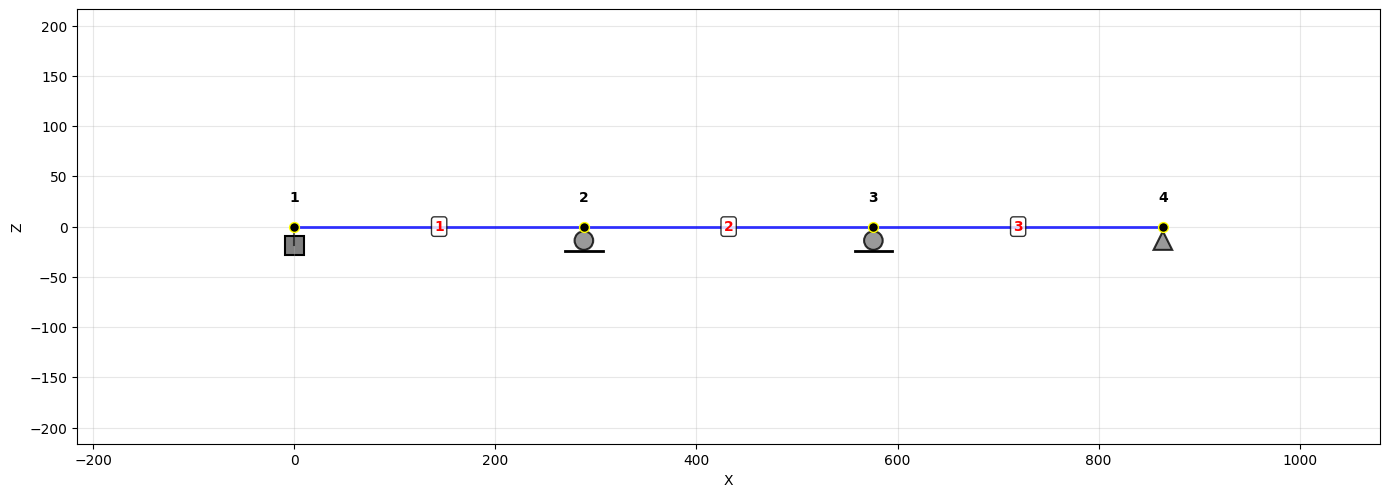

In [2]:
# Crear el sistema estructural
system = StructuralMatrixAnalysis()
plotter = StructuralPlotter(system)

# Definir propiedades del material y secciones
E = 10000
A = 1
I = 540

# Definición de Nodos (Geometría)
system.defineNode(1, x=0, z=0)
system.defineNode(2, x=24*12, z=0)
system.defineNode(3, x=2*24*12, z=0)
system.defineNode(4, x=3*24*12, z=0)

# Asignación de Restricciones (Condiciones de Apoyo)
system.assignJoint.restrictions(1, ux=True, uz=True, ry=True)
system.assignJoint.restrictions(2, ux=False, uz=True, ry=False)
system.assignJoint.restrictions(3, ux=False, uz=True, ry=False)
system.assignJoint.restrictions(4, ux=True, uz=True, ry=False)

# Definición de Elementos (Conectividad)
system.defineElement(1, 1, 2, A=A, E=E, I=I)
system.defineElement(2, 2, 3, A=A, E=E, I=I)
system.defineElement(3, 3, 4, A=A, E=E, I=I)

# Asignación de Cargas
system.assignElement.uniformLoad(1, w=3/12)
system.assignElement.pointForce(3, P=10, distance=1/3)
system.assignElement.pointForce(3, P=10, distance=2/3)
#system.assignElement.releases(3, start=False, end=True)

# Visualización Inicial
plotter.showFrame()

In [3]:
# Ejecución del Análisis Matricial
system.RunCompleteAnalysis(show_process=True)


--------------------------------------------------------------------------------
 1. INFORMACIÓN GENERAL
--------------------------------------------------------------------------------
Número de nodos: 4
Número de elementos: 3
Grados de libertad totales: 12
Grados de libertad restringidos (desplazamientos conocidos): 8 de 12
GL restringidos: [ 0  1  2  4  7  9 10 11]
Grados de libertad libres (fuerzas conocidas): 4 de 12
GL libres: [3 5 6 8]

--------------------------------------------------------------------------------
 2. MATRICES PARTICIONADAS
--------------------------------------------------------------------------------
KAA (4x4):
  |         3 |          5 |          6 |          8 |

  |         69 |          0 |        -35 |          0 |
  |          0 |     150000 |          0 |      37500 |
  |        -35 |          0 |         69 |          0 |
  |          0 |      37500 |          0 |     131250 |
 
KAB (4x8):
  |         0 |          1 |          2 |          4 |    

In [4]:
# Obtención de Resultados Detallados de Elementos
system.getInfoElements()

ELEMENTO 1: [1, 2]  - Tipo 0
PROPIEDADES
  Longitud: 288.000
  Área (A): 1.0000e+00
  Módulo elástico (E): 1.0000e+04
  Momento de inercia (I): 5.4000e+02
  Liberaciones:  Nodo i = NO | Nodo j = NO
  Orientación: C=1.000 | S=0.000

CARGAS APLICADAS:
  1) Carga uniforme: w=0.250 en toda la longitud

MATRIZ DE TRANSFORMACIÓN T (6x6):
  |      1.000 |      0.000 |      0.000 |      0.000 |      0.000 |      0.000 |
  |     -0.000 |      1.000 |      0.000 |      0.000 |      0.000 |      0.000 |
  |      0.000 |      0.000 |      1.000 |      0.000 |      0.000 |      0.000 |
  |      0.000 |      0.000 |      0.000 |      1.000 |      0.000 |      0.000 |
  |      0.000 |      0.000 |      0.000 |     -0.000 |      1.000 |      0.000 |
  |      0.000 |      0.000 |      0.000 |      0.000 |      0.000 |      1.000 |

MATRIZ DE RIGIDEZ LOCAL K (6x6):
  |     34.722 |      0.000 |      0.000 |    -34.722 |      0.000 |      0.000 |
  |      0.000 |      2.713 |    390.625 |      0.000 |   

In [5]:
system.getInfoNodes()

Node 1: (0, 0) - Empotrado
  Desplazamientos: Ux=0.0000e+00, Uz=0.0000e+00, Ry=0.0000e+00
  Fuerzas: Fx=0.000, Fz=41.615, My=2267.077

Node 2: (288, 0) - Móvil en X
  Desplazamientos: Ux=0.0000e+00, Uz=0.0000e+00, Ry=1.4375e-02
  Fuerzas: Fx=0.000, Fz=31.538, My=0.000

Node 3: (576, 0) - Móvil en X
  Desplazamientos: Ux=0.0000e+00, Uz=0.0000e+00, Ry=-1.1422e-02
  Fuerzas: Fx=0.000, Fz=9.949, My=0.000

Node 4: (864, 0) - Fijo
  Desplazamientos: Ux=0.0000e+00, Uz=0.0000e+00, Ry=1.4244e-02
  Fuerzas: Fx=0.000, Fz=8.897, My=0.000


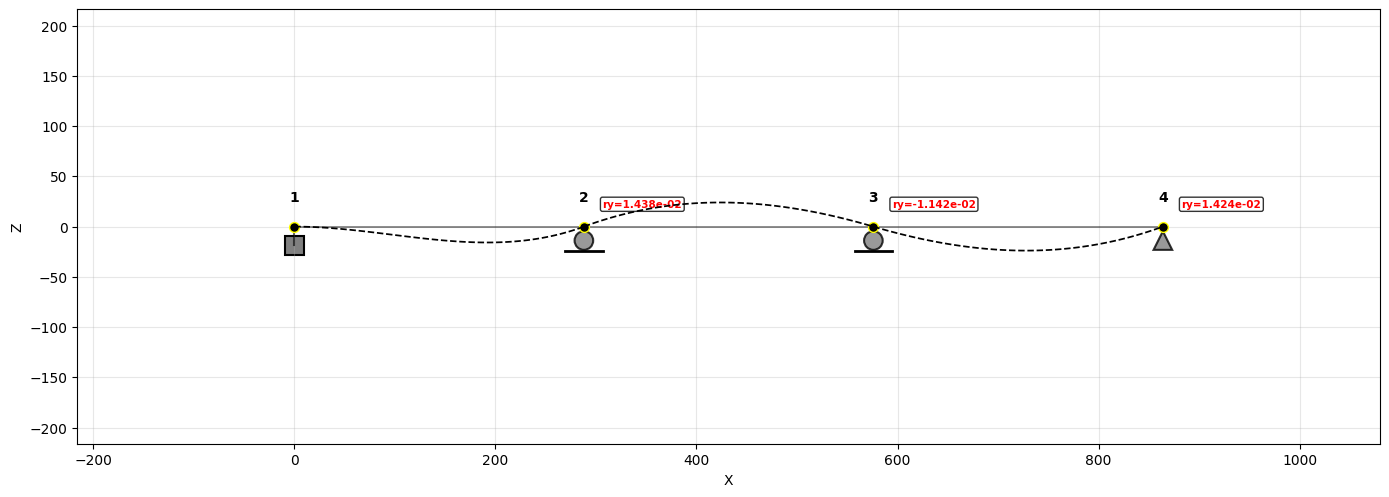

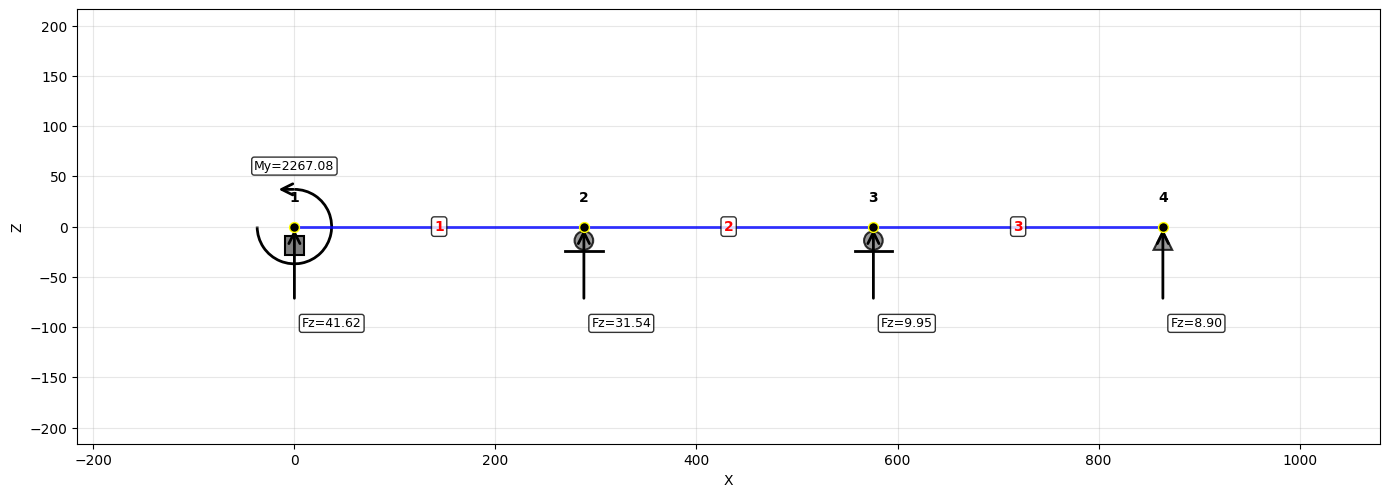

In [6]:
# Visualización de Resultados
plotter.showDeformedShape(escala=0.005)
plotter.showReactions()